In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from convert_msqrob2_to_scatterplot_input import convert_msqrob2_to_scatterplot
from convert_msstats_to_scatterplot_input import convert_msstats_to_scatterplot
from convert_triqler_to_scatterplot_input import convert_triqler_to_scatterplot


In [8]:
df_top3 = pd.read_csv("results/ID/top3_results.csv", sep = "\t")
df_msqrob2 = convert_msqrob2_to_scatterplot(input_res = "results/ID/msqrob2_results.csv", input_protein_quant = "results/ID/msqrob2_protein_quant_results.csv")
df_msstats = convert_msstats_to_scatterplot(input_res = "results/ID/msstats_results.csv", input_protein_quant = "results/ID/msstats_protein_quant_results.csv")
df_triqler = convert_triqler_to_scatterplot(input_file = "results/ID/triqler_results.csv")

In [22]:
def plot_scatterplot(df, xlim = False, ylim = False, reverse_logFC = False):
    if reverse_logFC == True:
            df["log2(A,B)"] = -df["log2(A,B)"]
    f, ax = plt.subplots(1, 1, figsize = (15,8))
    sns.regplot(data = df[df.specie == "ECOLI"], x = "2", y = "log2(A,B)", ax = ax, line_kws = {"ls":"--"}, label ="ECOLI")
    sns.regplot(data = df[df.specie == "HUMAN"], x = "2", y = "log2(A,B)", ax = ax, line_kws = {"ls":"--"}, label = "HUMAN")
    sns.regplot(data = df[df.specie == "YEAST"], x = "2", y = "log2(A,B)", ax = ax, line_kws = {"ls":"--"}, label = "YEAST")
    ax.legend()
    ax.axhline(2, linestyle = "--", color="tab:blue", alpha = 0.5)
    ax.axhline(0, linestyle = "--", color="tab:orange", alpha = 0.5)
    ax.axhline(-1, linestyle = "--", color="tab:green", alpha = 0.5)
    if xlim == False:
        pass
    else:
        ax.set_ylim(ylim)
    if ylim == False:
        pass
    else:
        ax.set_xlim(xlim)
    ax.set_xlabel("log2(B)")
    plt.title("std/mu ratio for log-transformed peptide values")

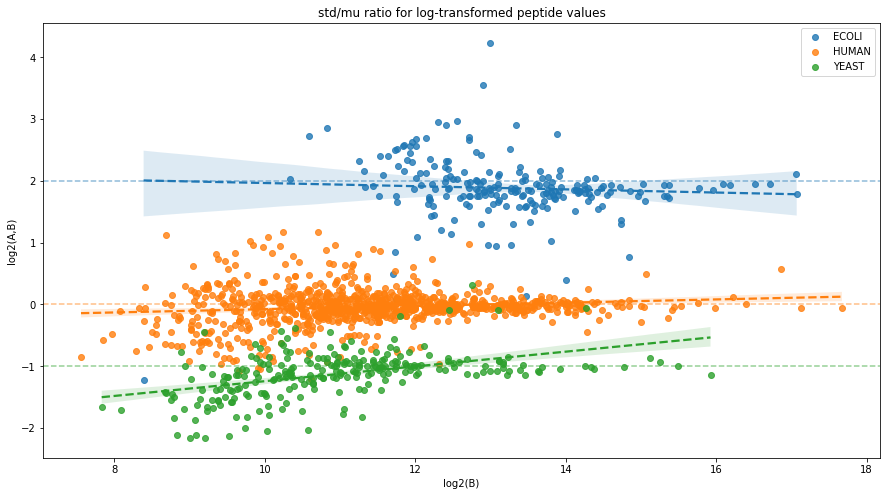

In [23]:
plot_scatterplot(df_top3, reverse_logFC = True)

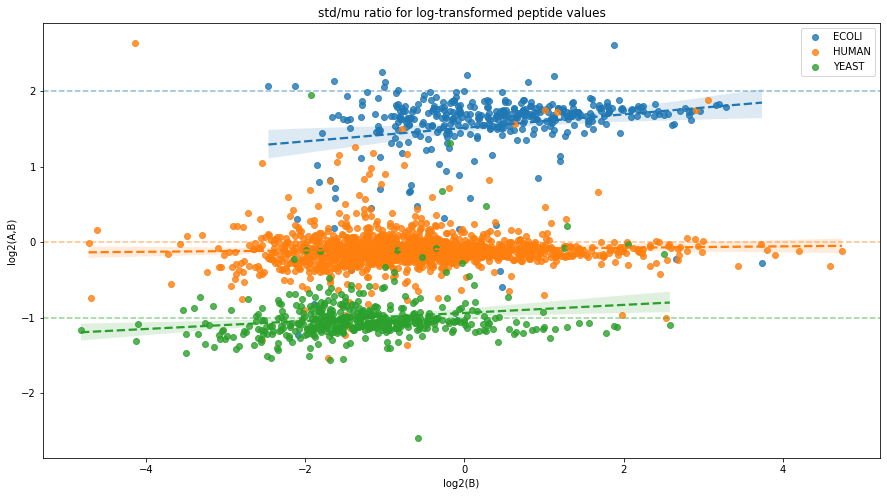

In [15]:
plot_scatterplot(df_msqrob2)

/home/ptruong/anaconda3/envs/snakemake/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1584: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,


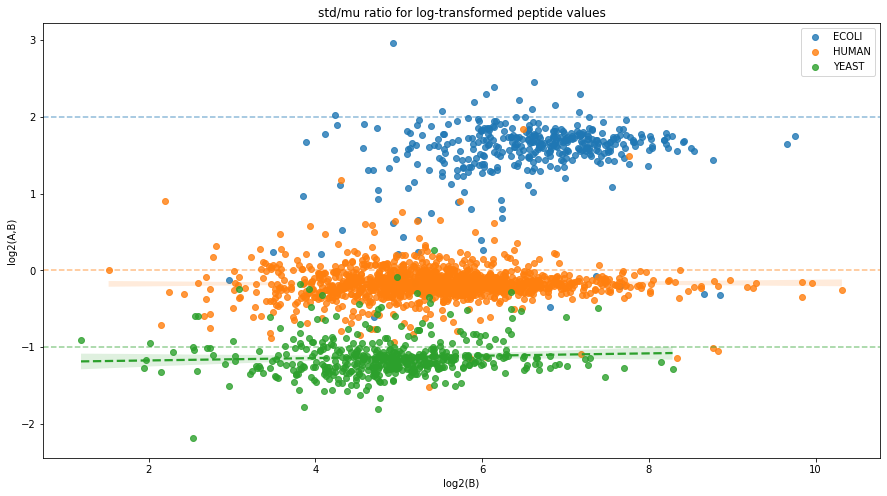

In [16]:
plot_scatterplot(df_msstats)

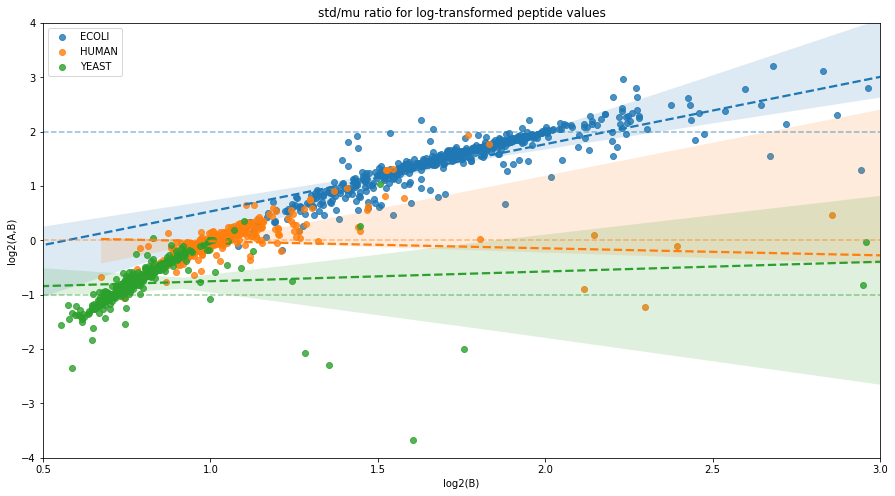

In [25]:
plot_scatterplot(df_triqler, ylim = [-4, 4], xlim = [0.5, 3], reverse_logFC = True)